# Лабораторная работа 3
## Вариант 1
<br>
Иванов О. S4102

### 1. Метод моментов

Дано распределение плотности:

$$
    f^{\theta}(x) = \frac{1}{2\theta}e^{-\frac{|x|}{\theta}}
$$

Параметр $\mu$ отсутсвтует, поэтому считаем $\mu = 0$ <br>
Получим CDF, проинтегрировава распределение плотности:
$$
    F^{\theta}(x) = \int\limits_{-\infin}^{x}\frac{1}{2\theta}e^{-\frac{|t|}{\theta}}dt =
    \begin{cases}
        \frac{1}{2}e^{\frac{x}{\theta}} & ,x < 0\\
        1 - \frac{1}{2}e^{-\frac{x}{\theta}} & ,x\ge 0
    \end{cases}
$$


Рассчитываем CDF и обратную ей функцию для создания выборок:
$$
F^{\theta}(x) = \int_{-\infty}^{x} f^{\theta}(t) \,dt
$$
Поскольку имеем модуль, разделяем на две части:
$$
F^{\theta}(x) = \int_{-\infty}^{x} \frac{1}{2\theta}e^{-\frac{|t|}{\theta}} \,dt
$$
Для $x < 0$:
$$
F^{\theta}(x) = \int_{-\infty}^{x} \frac{1}{2\theta}e^{\frac{t}{\theta}} \,dt
$$
$$
F^{\theta}(x) = \frac{1}{2} e^{\frac{x}{\theta}}
$$
$$
x = -\theta \ln(2u)
$$
Для $x \geq 0$:
$$
F^{\theta}(x) = \int_{-\infty}^{0} \frac{1}{2\theta}e^{\frac{t}{\theta}} \,dt + \int_{0}^{x} \frac{1}{2\theta}e^{-\frac{t}{\theta}} \,dt
$$



$$
    \int_{-\infty}^{0} \frac{1}{2\theta}e^{\frac{t}{\theta}} \,dt = \frac{1}{2}
$$

$$
    \int_{0}^{x} \frac{1}{2\theta}e^{-\frac{t}{\theta}} \,dt = -\frac{1}{2} e^{-\frac{x}{\theta}} + \frac{1}{2}
$$

$$
    F^{\theta}(x) = \frac{1}{2} + \frac{1}{2}e^{-\frac{x}{\theta}}
$$

$$
    x = -\theta \ln(1 - 2u)
$$

Первый теоретический момент:
$$
    E_{\xi} = \int\limits_{-\infin}^{\infin}x \cdot \frac{1}{2\theta}e^{-\frac{|x|}{\theta}}dx = - \frac{1}{2\theta}\int\limits_{-\infin}^{0}x e^{-\frac{x}{\theta}}dx + \frac{1}{2\theta}\int\limits_{0}^{\infin}x e^{-\frac{x}{\theta}}dx = 0
$$

In [ ]:
from sympy import *

x, theta = symbols('x theta')

f = x*(1/2*theta)*exp(-Abs(x)/theta)

integrate(f, (x,-oo, oo))

Piecewise((0, Abs(arg(theta)) < pi/2), (Integral(0.5*theta*x*exp(-Abs(x)/theta), (x, -oo, oo)), True))

In [ ]:
from sympy import *

x, theta = symbols('x theta')

f = ((x)**2)*(1/(2*theta))*exp(-Abs(x)/theta)

integrate(f, (x,-oo, oo))

Piecewise((2*theta**2, Abs(arg(theta)) < pi/2), (Integral(x**2*exp(-Abs(x)/theta)/(2*theta), (x, -oo, oo)), True))

Для распределения лапласа первый теоретический момент равен параметру ${\mu}$, <br>
следовательно,
$$
    E_{\xi} = \mu
$$

Variance для распределения лапласа:
$$
    Var_\xi = 2\theta^2
$$

$$
    \theta = \sqrt{\frac{Var_\xi}{2}}
$$

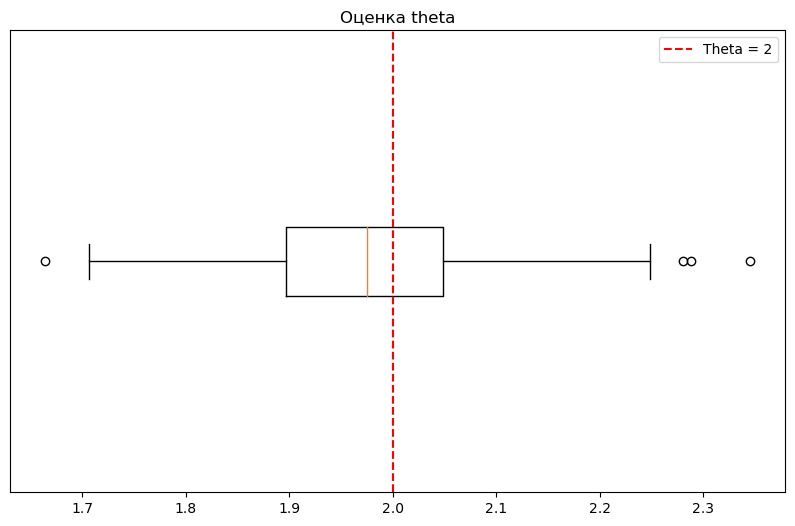

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


num_samples = 100
sample_size = 1000
true_theta = 2


def estimate_theta(sample):
    return (np.var(sample) / 2)**1/2


theta_estimates = []
for _ in range(num_samples):
    sample = np.random.laplace(scale=true_theta, size=sample_size)
    theta_estimate = estimate_theta(sample)
    theta_estimates.append(theta_estimate)


plt.figure(figsize=(10, 6))
plt.boxplot(theta_estimates, vert=False)
plt.axvline(x=true_theta, color='red', linestyle='--', label=f'Theta = {true_theta}')
plt.title('Оценка theta')
plt.yticks([])
plt.legend()
plt.show()


### 1.2 Метод максимального правдоподобия

Дано распределение плотности случайной величины:

$$
    f^{\theta}(x) = \frac{3x^2}{\sqrt{2\pi}}e^{-\frac{(\theta - x^3)^2}{2}}
$$

Функция правдоподобия - функция распределения плотности (pdf) от параметра $\theta$

$$
    L(\theta, \xi) = \prod_{i=1}^{n}f(x_i, \theta)
$$

$$
    \ln{L(\theta, \xi)} = \sum \ln{\frac{3x^2}{\sqrt{2\pi}}e^{-\frac{(\theta - x^3)^2}{2}}}
$$

$$
    \ln{L(\hat\theta, \xi)} = \sum{(\ln{3} + 2\ln{x} - \frac{1}{2}\ln{2\pi}-\frac{(\hat\theta-x^3)^2}{2})}
$$

$$
    argmaxL(\hat\theta, \xi) = L' = \\
    = -\frac{1}{2}\sum2u [u = (\hat\theta - x^3)] = -\sum(\hat\theta - x^3) = \\
    = - (n\hat\theta-\sum{x^3}) = 0
$$

$$
    \hat\theta = \frac{\sum{x^3}}{n}
$$

Проверяем характер найденного экстремума:

$$
    L'' = -n < 0
$$

Таким образом, найденный экстремум является максимумом

In [ ]:
import numpy as np
from scipy.stats import rv_continuous
from tqdm import tqdm
import matplotlib.pyplot as plt

#def pdf(x, theta):
#  return ((3*(x**2))/(2*np.pi)**(1/2)) * np.exp((-(theta-x**3)**2)/2)

class CustomDistribution(rv_continuous):
    def _pdf(self, x, theta):
      constant = 3 / np.sqrt(2 * np.pi)
      return constant * x**2 * np.exp(-0.5 * ((theta - x**3)**2))

def estimate_theta(x):
    return sum(x**3)

theta_true = 4
sample_size = 1000
num_samples = 100

custom_dist = CustomDistribution(name='custom')

theta_estimates = []

for sample in tqdm(range(0, num_samples)):
    generated_samples = custom_dist.rvs(theta=theta_true, size=sample_size)
    theta_estimated = estimate_theta(generated_samples) / len(generated_samples)
    theta_estimates.append(theta_estimated)


print(theta_estimates)



100%|██████████| 100/100 [27:10<00:00, 16.30s/it]

[4.025842255189293, 4.678518278730455, 4.041888494585819, 4.027927757136641, 4.013734762286376, 4.659028568222429, 4.709640945922874, 4.001559027177812, 3.997412847778412, 4.026483872756977, 4.0050391875730265, 3.9804277120831206, 4.646515636551573, 4.028875073112553, 3.9615757207177693, 4.650409462243978, 4.70875394083089, 3.9643014710788225, 3.996350710124274, 3.9446501944565764, 4.70945030078798, 4.004799490311101, 5.31445790653446, 4.653321111132588, 4.000107124903552, 3.997277888193291, 4.039817917683722, 4.628470804461555, 3.968483460908267, 4.640844660979992, 3.9976929182120267, 4.6510490497240555, 5.287002425844415, 3.9871541342233017, 3.926064687329113, 4.049261625923641, 4.644393958835325, 4.02637876543341, 4.032207038407329, 4.030762304954261, 4.00984347723368, 3.9837349771632256, 3.9807231995138173, 4.631494524932479, 4.0253739839992235, 4.0199216144768855, 4.685792639780813, 5.292219971467808, 3.9926809915415253, 4.0174444958315805, 4.016110188616959, 4.009193324772909, 4.

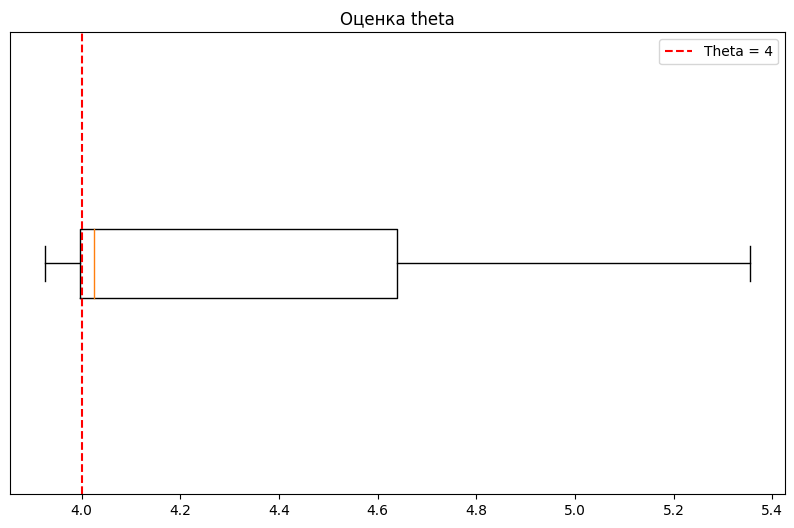

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(theta_estimates, vert=False)
plt.axvline(x=theta_true, color='red', linestyle='--', label=f'Theta = {theta_true}')
plt.title('Оценка theta')
plt.yticks([])
plt.legend()
plt.show()

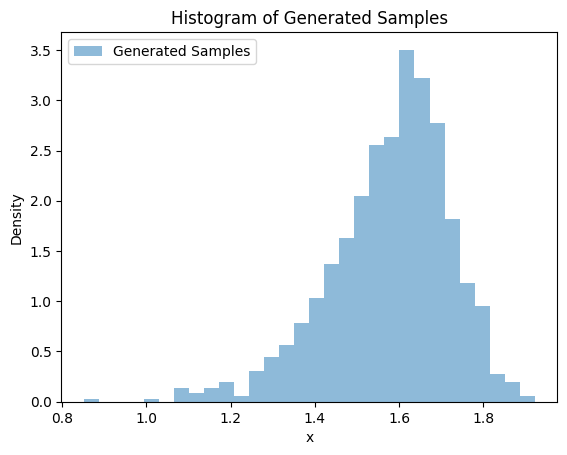

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from tqdm import tqdm

class CustomDistribution(rv_continuous):
    def _pdf(self, x, theta):
      constant = 3 / np.sqrt(2 * np.pi)
      return constant * x**2 * np.exp(-0.5 * ((theta - x**3)**2))

theta_true = 4
sample_size = 1000
num_samples = 100

custom_dist = CustomDistribution(name='custom')

generated_samples = custom_dist.rvs(theta=theta_true, size=sample_size)

plt.hist(generated_samples, bins=30, density=True, alpha=0.5, label="Generated Samples")
plt.title("Histogram of Generated Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


### Задание 1.3 Методы понижения размерности

Считываем датасет

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Смотрим значения таргет:

In [ ]:
np.unique(data['diagnosis'])

array(['B', 'M'], dtype=object)

Данные необходимо масштабировать, используем StandardScaler

Понижаем размерность с помощью TSNE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

tsne = TSNE(n_components=2, verbose=1, random_state=42)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X = sc.fit_transform(X)

X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.430424
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.997269
[t-SNE] KL divergence after 1000 iterations: 0.923348


Визуализируем данные с новой размерностью. По графику видим, что "на глаз" можно правильно отнести к классам 70-80% объектов.

<ipython-input-10-7439f6d069b5>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=sns.color_palette("hls", 10))


<Axes: >

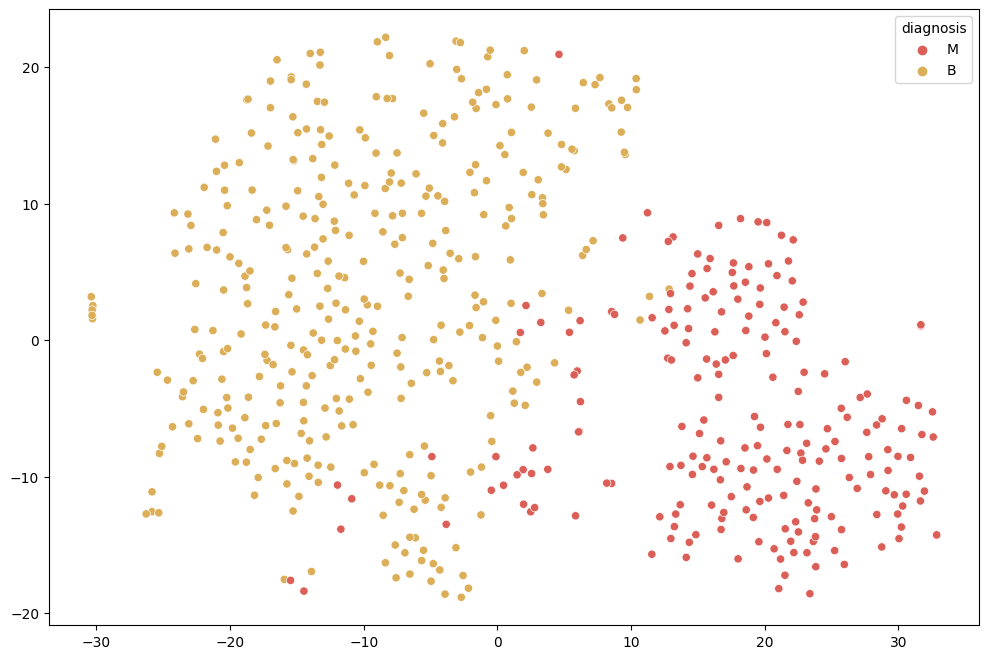

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=sns.color_palette("hls", 10))

#### KNN
Применяем KNN на данных с новой размерностью

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder, LabelBinarizer

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

knn = KNeighborsClassifier()

knn.fit(X_tsne, y_encoded)
y_knn = knn.predict(X_tsne)
f1_score(y_encoded, y_knn)

0.9669811320754716

In [ ]:
len(y[y=='M'])

212

In [ ]:
len(y_encoded[y_encoded == 1])

212

<ipython-input-14-610a11169347>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_knn, palette=sns.color_palette("hls", 10))


<Axes: >

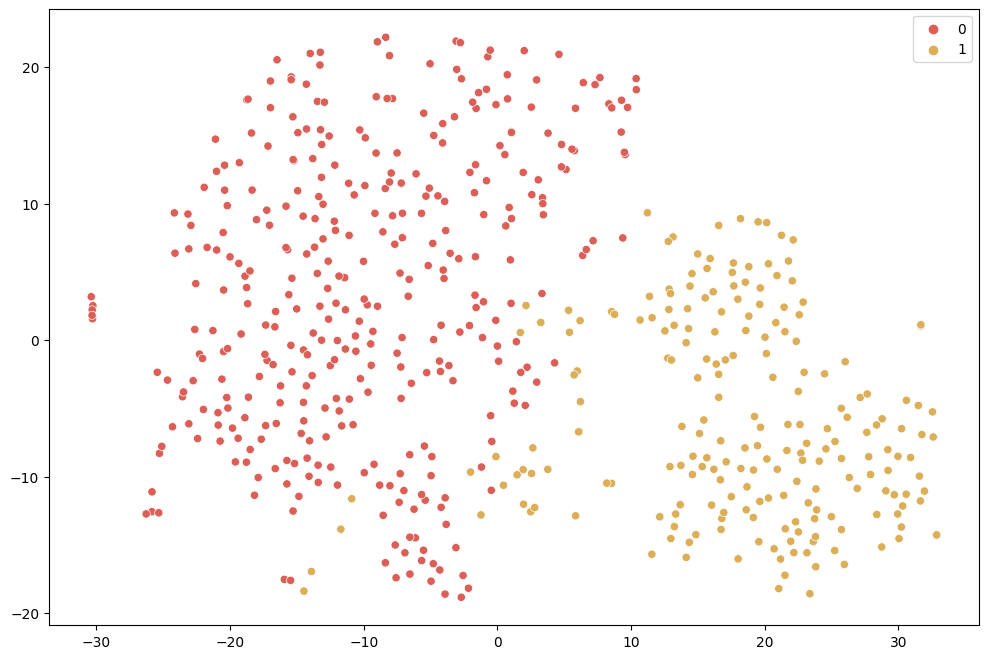

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_knn, palette=sns.color_palette("hls", 10))

#### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_pca, y_encoded)

KNeighborsClassifier()

f1_score на тренировочных данных несколько выше при использовании PCA, чем при понижении размерности с помощью TSNE


In [ ]:
y_knn_pca = knn.predict(X_pca)
f1_score(y_encoded, y_knn_pca)

0.9311163895486936

<ipython-input-18-814eedd2bd8b>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_knn_pca, palette=sns.color_palette("hls", 10))


<Axes: >

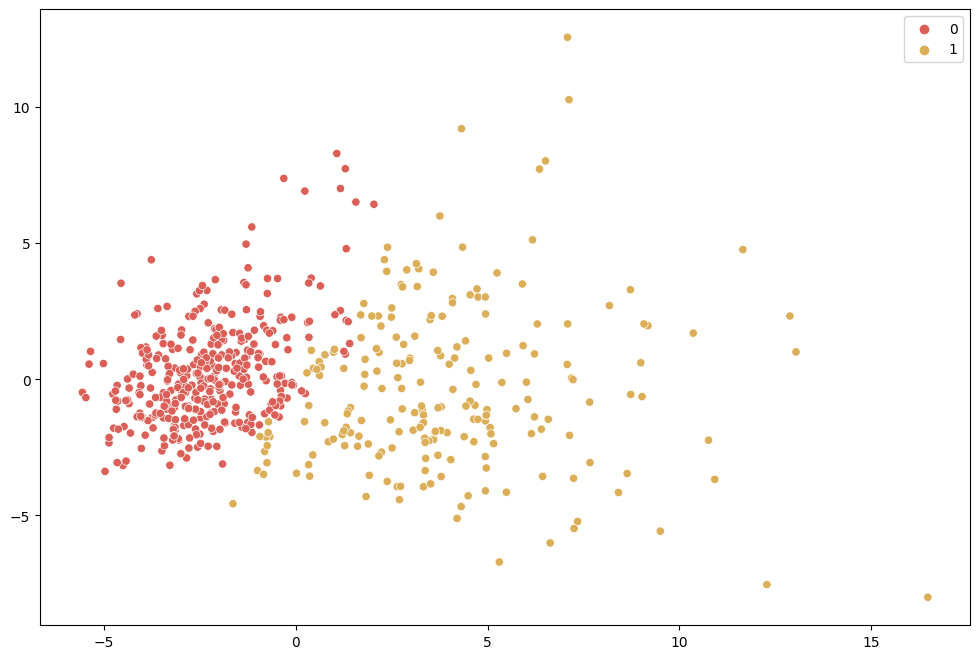

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_knn_pca, palette=sns.color_palette("hls", 10))

Проверяем работу KNN с разными метриками расстояния. Получаем список возможных метрик из sklearn.pairwise.distance_metrics

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer


pca = PCA(n_components=2, svd_solver='full')
knn = KNeighborsClassifier()

distance_array = []

for i in pairwise.distance_metrics():
    distance_array.append(i)

params = {
    'knn__metric': distance_array
}

pipe = Pipeline(
    [
        ('pca', pca),
        ('knn', knn)
    ]
)

grid = GridSearchCV(estimator = pipe, param_grid=params, n_jobs=-1, cv=5, scoring=make_scorer(f1_score))
grid.fit(X, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=2, svd_solver='full')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['cityblock', 'cosine', 'euclidean',
                                         'haversine', 'l2', 'l1', 'manhattan',
                                         'precomputed', 'nan_euclidean']},
             scoring=make_scorer(f1_score))

In [ ]:
cv_results = grid.cv_results_

In [ ]:
cv_results = pd.DataFrame(cv_results)

In [ ]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006318,0.003484,0.016235,0.004137,cityblock,{'knn__metric': 'cityblock'},0.909091,0.913580,0.902439,0.915663,0.906977,0.909550,0.004712,5
1,0.004102,0.000435,0.018581,0.002532,cosine,{'knn__metric': 'cosine'},0.898876,0.939759,0.953488,0.941176,0.942529,0.935166,0.018783,1
2,0.003976,0.000181,0.015349,0.001560,euclidean,{'knn__metric': 'euclidean'},0.898876,0.915663,0.902439,0.939759,0.917647,0.914877,0.014409,2
3,0.005573,0.001977,0.029418,0.008938,haversine,{'knn__metric': 'haversine'},0.467532,0.347826,0.414634,0.318841,0.363636,0.382494,0.052676,8
4,0.004252,0.000634,0.016116,0.001521,l2,{'knn__metric': 'l2'},0.898876,0.915663,0.902439,0.939759,0.917647,0.914877,0.014409,2
5,0.003880,0.000073,0.016571,0.003215,l1,{'knn__metric': 'l1'},0.909091,0.913580,0.902439,0.915663,0.906977,0.909550,0.004712,5
6,0.004120,0.000309,0.015885,0.001292,manhattan,{'knn__metric': 'manhattan'},0.909091,0.913580,0.902439,0.915663,0.906977,0.909550,0.004712,5
7,0.003700,0.000237,0.000000,0.000000,precomputed,{'knn__metric': 'precomputed'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.003722,0.000666,0.217175,0.245999,nan_euclidean,{'knn__metric': 'nan_euclidean'},0.898876,0.915663,0.902439,0.939759,0.917647,0.914877,0.014409,2


In [ ]:
pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,knn__metric,Accuracy
0,cityblock,0.909550
1,cosine,0.935166
2,euclidean,0.914877
3,haversine,0.382494
4,l2,0.914877
5,l1,0.909550
6,manhattan,0.909550
7,precomputed,NaN
8,nan_euclidean,0.914877


In [ ]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=2, svd_solver='full')),
                ('knn', KNeighborsClassifier(metric='cosine'))])

In [ ]:
model = grid.best_estimator_

model.fit(X, y_encoded)
y_model = model.predict(X)
f1_score(y_encoded, y_model)

0.9417249417249417

<ipython-input-22-fc2340599ebb>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_model, palette=sns.color_palette("hls", 10))


<Axes: >

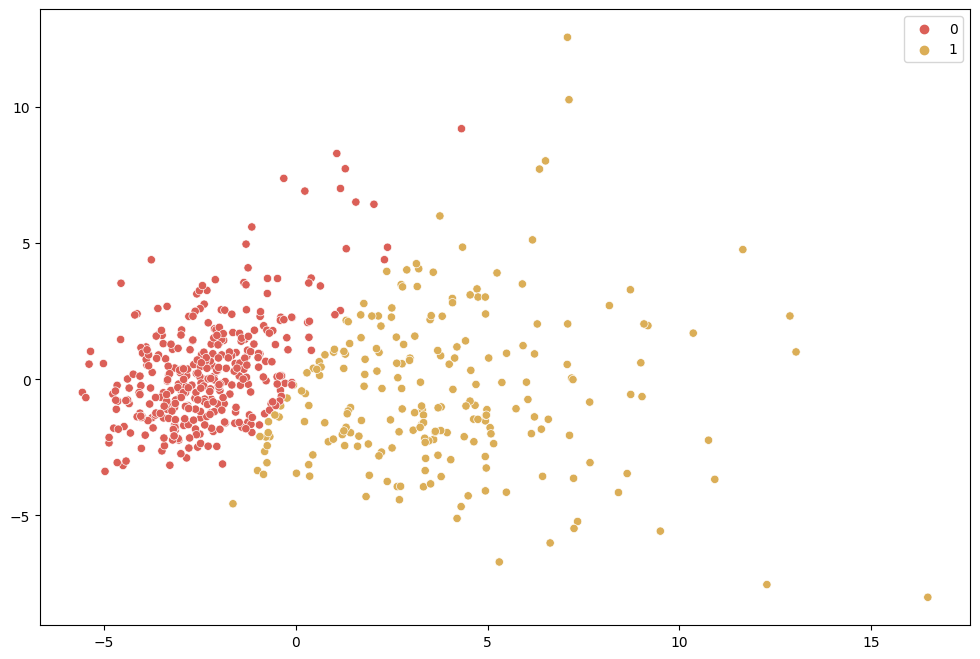

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_model, palette=sns.color_palette("hls", 10))

### Разделение на тренировочную и тестовую выборки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier


Чтение данных

In [ ]:
df = pd.read_csv('data.csv')

Разделение данных на тренировочную и тестовую выборки 80% : 20%

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Масштабирование данных с помощью StandardScaler

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Уменьшение размерности с помощью TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

<ipython-input-95-0620899ddbbc>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train, palette=sns.color_palette("hls", 10))


<Axes: >

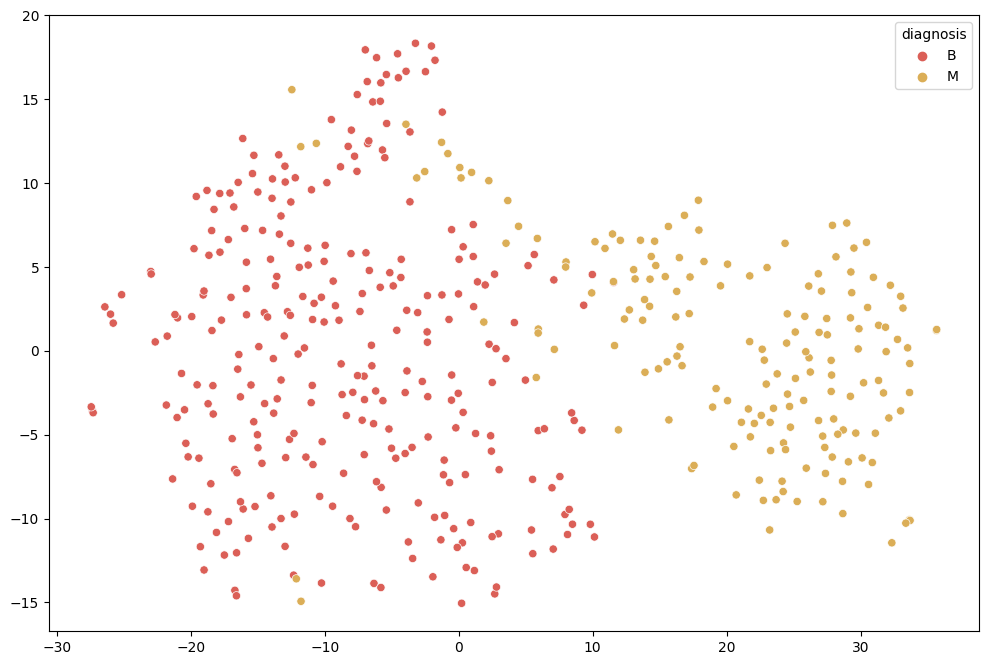

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train, palette=sns.color_palette("hls", 10))

Применение KNN

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

knn = KNeighborsClassifier()

knn.fit(X_train_tsne, y_train_encoded)

y_train_knn = knn.predict(X_train_tsne)
y_test_knn = knn.predict(X_test_tsne)

<ipython-input-63-c68c0b033a82>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train_knn, palette=sns.color_palette("hls", 10))


<Axes: >

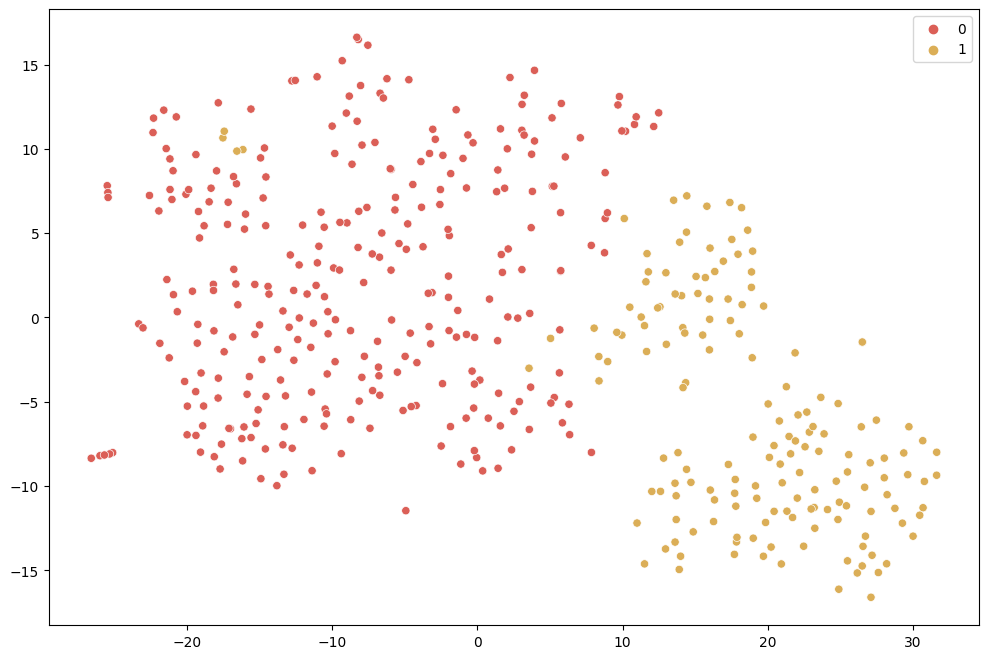

In [ ]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train_knn, palette=sns.color_palette("hls", 10))

In [ ]:
pca = PCA(n_components=2, svd_solver='full')

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<Axes: >

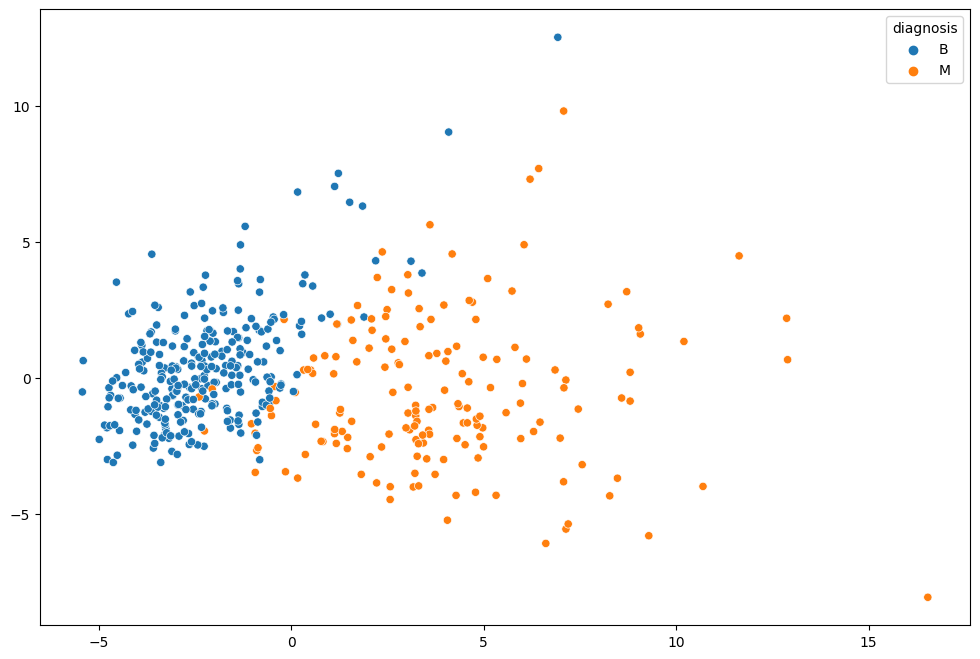

In [ ]:
sns.scatterplot(x = X_train_pca[:, 0], y = X_train_pca[:, 1], hue=y_train)

In [ ]:
knn.fit(X_train_pca, y_train_encoded)

y_test_predict = knn.predict(X_test_pca)

f1_score(y_test_encoded, y_test_predict)

0.8809523809523809